<a href="https://colab.research.google.com/github/entangelk/study_data_analytics/blob/main/docs/quests/EDAs/EDA_ShoppingMallDeliveryWithDate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 한글 폰트 설치 및 시각화

In [ ]:
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab의 경우 런타임메뉴에서 리스타트 세션 해줘야함

- 한글 폰트 설치가 끝났으면 리스타트 잊지말라구!

In [1]:
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd

In [4]:
# 유니코드 마이너스 사용 설정
plt.rcParams['axes.unicode_minus'] = False

In [5]:
import numpy as np

## 시작

In [6]:
get_data = pd.read_csv('ShoppingMallDeliveryWithDate_redown.csv')
get_data

,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일
0,무통장입금,D-20181227-0000648-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,71450,1077,1,PC쇼핑몰,20181227
1,무통장입금,D-20181229-0000119-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,141240,42,2,모바일웹,20181229
2,무통장입금,D-20181230-0000100-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,13910,1271,1,모바일웹,20181230
3,무통장입금,D-20181231-0000087-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,81600,1085,1,모바일웹,20181231
4,무통장입금,D-20181231-0000108-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,94710,1106,1,모바일웹,20181231
...,...,...,...,...,...,...,...,...,...
26947,무통장입금,D-20180723-0000042-00,2018-07-24 오후 6:45,2018-07-28 오전 5:32,70500,42,1,PC쇼핑몰,20180723
26948,무통장입금,D-20180723-0000042-00,2018-07-24 오후 6:45,2018-07-28 오전 5:32,0,1209,1,PC쇼핑몰,20180723
26949,무통장입금,D-20180723-0000052-00,2018-07-24 오전 9:50,2018-07-28 오전 5:32,184760,1036,2,PC쇼핑몰,20180723
26950,무통장입금,D-20180723-0000052-00,2018-07-24 오전 9:50,2018-07-28 오전 5:32,0,1209,1,PC쇼핑몰,20180723


### 연속형 -> 범주형 만들기 (상품구매금액)

In [7]:
get_data.query('상품구매금액 != 0')['상품구매금액'].sort_values()

1843         700
23845       2370
20806       2500
1150        3590
13391       3670
          ...   
1541     1325000
8744     1470750
2615     1691250
20642    1920000
24512    4963400
Name: 상품구매금액, Length: 24062, dtype: int64

In [8]:
bins = [-1,0,9999,49999,99999,499999,9999999999]
labels = ['0','1-10000','10001-50000','50001-100000','100001-500000','500000+']
get_data['상품구매금액_category'] = pd.cut(x=get_data['상품구매금액'], bins=bins, labels=labels)

In [9]:
get_data['상품구매금액_category']

0         50001-100000
1        100001-500000
2          10001-50000
3         50001-100000
4         50001-100000
             ...      
26947     50001-100000
26948                0
26949    100001-500000
26950                0
26951    100001-500000
Name: 상품구매금액_category, Length: 26952, dtype: category
Categories (6, object): ['0' < '1-10000' < '10001-50000' < '50001-100000' < '100001-500000' <
                         '500000+']

In [10]:
get_data['상품구매금액_category'].value_counts().sort_index()

0                 2890
1-10000            207
10001-50000       3399
50001-100000     14955
100001-500000     5478
500000+             23
Name: 상품구매금액_category, dtype: int64

### 제안 9: 고객 피드백 및 배송 만족도 조사 (폐기)
- 문제 정의: 배송 서비스에 대한 고객 피드백 및 만족도를 조사하여 서비스 개선점을 도출합니다.
- 배경: 고객 피드백과 만족도 조사를 통해 배송 서비스의 질을 평가하고, 고객의 요구에 부합하는 서비스 개선을 진행할 수 있습니다.


#### 상품구매금액의 이상치(0원)에 대한 분석
- 이것이 가격이 적히지 않은 이상치인가?
- 이것은 환불, 교환 등으로 인해 고객이 비용을 지불하지 아니하여도 괜찮은 배송이었는가?

#### 상품구매금액과 수량의 주요 고객층, 하위고객층, 상위고객층을 나누어 만족도 조사
- 를위한 분석을 하려하였으나 탈락

In [11]:
get_data['상품구매금액'].mean()

74349.73675422974

In [12]:
get_data.query('상품구매금액 != 0')[['상품구매금액','수량','상품번호']]

,상품구매금액,수량,상품번호
0,71450,1,1077
1,141240,2,42
2,13910,1,1271
3,81600,1,1085
4,94710,1,1106
...,...,...,...
26944,109100,1,1121
26945,55480,1,248
26947,70500,1,42
26949,184760,2,1036


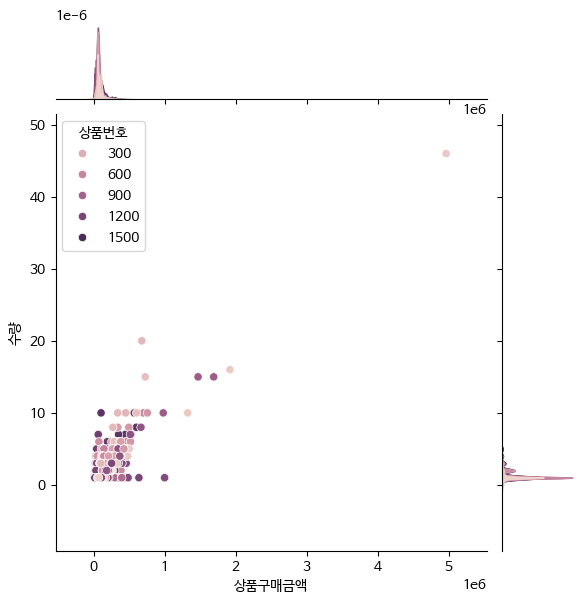

In [13]:
sns.jointplot(data=get_data.query('상품구매금액 != 0'), x='상품구매금액', y='수량', hue='상품번호')

### 이상치 처리
- 상품구매금액이 '0'인 이유를 확인
- 상품 번호를 확인하여 동일한 상품번호의 다른 데이터와 비교

In [14]:
zero_index = get_data.query('상품구매금액 == 0')['상품번호'].unique().tolist()
zero_index

[582,
 627,
 583,
 352,
 360,
 355,
 534,
 359,
 584,
 354,
 579,
 580,
 357,
 358,
 589,
 581,
 356,
 533,
 350,
 353,
 588,
 351,
 1136,
 587,
 1159,
 1165,
 1164,
 1162,
 1163,
 1209,
 1238,
 1237,
 1243]

In [15]:
zero_price = get_data.query(f'상품번호 == {zero_index}')
zero_price

,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일,상품구매금액_category
17551,무통장입금,D-20171227-0000094-00,2018-01-02 오후 5:59,2018-01-06 오전 5:33,0,582,1,PC쇼핑몰,20171227,0
17558,카드,D-20180102-0000019-00,2018-01-02 오후 5:59,2018-01-06 오전 5:33,0,627,1,모바일웹,20180102,0
17562,무통장입금,D-20180102-0000022-00,2018-01-05 오전 10:02,2018-01-09 오전 5:35,0,583,1,PC쇼핑몰,20180102,0
17565,카드,D-20180102-0000045-00,2018-01-02 오후 5:59,2018-01-06 오전 5:33,0,352,1,모바일웹,20180102,0
17569,카드,D-20180102-0000073-00,2018-01-02 오후 5:59,2018-01-06 오전 5:33,0,360,1,PC쇼핑몰,20180102,0
...,...,...,...,...,...,...,...,...,...,...
26938,"쿠폰,카드",D-20180722-0000150-00,2018-07-24 오전 9:50,2018-07-28 오전 5:32,0,1209,1,모바일웹,20180722,0
26943,카드,D-20180723-0000016-00,2018-07-24 오전 9:50,2018-07-28 오전 5:32,0,1238,1,모바일웹,20180723,0
26946,카드,D-20180723-0000038-00,2018-07-24 오전 9:50,2018-07-28 오전 5:32,0,1237,1,모바일웹,20180723,0
26948,무통장입금,D-20180723-0000042-00,2018-07-24 오후 6:45,2018-07-28 오전 5:32,0,1209,1,PC쇼핑몰,20180723,0


In [16]:
pd.pivot_table(data=zero_price[['상품구매금액','상품번호']], index=['상품번호'], values=['상품구매금액'], aggfunc='sum')

,상품구매금액
상품번호,
350,0
351,0
352,0
353,0
354,0
355,23100
356,0
357,0
358,3700


- 355, 358 상품번호의 가격이 0이 아니므로 이 아이템에 대한 0값은 이상치일 확률이 매우 높음
- 355, 358의 이상치는 대표값으로 대체
- 다른 모든 상품번호는 모든 데이터의 합이 0이므로 원래 가격이 0이거나 따로 이벤트용 또는 교환 등의 상품을 다른 상품번호로 취급하였을 가능성이 높음

In [17]:
get_data.query('상품번호 == 355 & 상품구매금액 != 0')
# 355번 상품금액 = 23100원

,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일,상품구매금액_category
24539,무통장입금,D-20180621-0000128-03,2018-06-21 오후 8:44,2018-06-25 오전 5:32,23100,355,1,PC쇼핑몰,20180621,10001-50000


In [18]:
# get_data.query('상품번호 == 355')['상품구매금액'] = get_data.query('상품번호 == 355')['상품구매금액'].replace(0,23100)
get_data.loc[get_data['상품번호'] == 355, '상품구매금액'] = get_data.loc[get_data['상품번호'] == 355, '상품구매금액'].replace(0,23100)

In [19]:
get_data.query('상품번호 == 355 & 상품구매금액 == 0')

,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일,상품구매금액_category


- 상품번호 355 이상치 수정 완료

In [20]:
get_data.query('상품번호 == 358 & 상품구매금액 != 0')
# 358번 상품금액 = 3700원

,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일,상품구매금액_category
18284,"적립금,무통장입금",D-20180131-0000144-00,2018-02-01 오후 5:08,2018-02-05 오전 5:40,3700,358,1,PC쇼핑몰,20180131,1-10000


In [21]:
get_data.loc[get_data['상품번호'] == 358, '상품구매금액'] = get_data.loc[get_data['상품번호'] == 358, '상품구매금액'].replace(0,23100)

In [22]:
get_data.query('상품번호 == 358 & 상품구매금액 == 0')

,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일,상품구매금액_category


- 상품번호 358 이상치 수정 완료

- 이상치 별도로 추출하여 따로 저장 진행
- 정제된 값으로 분석 준비

In [23]:
zero_index = get_data.query('상품구매금액 == 0')['상품번호'].unique().tolist()
zero_price = get_data.query(f'상품번호 == {zero_index}').copy()
get_data['상품구매금액'] = get_data['상품구매금액'].replace(0,np.nan)

In [31]:
get_data = get_data.dropna()

- 2분화 완료
- get_data = 실제 판매 상품
- zero_price = 기타 0원 상품

In [32]:
zero_price

,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일,상품구매금액_category,주문일_month
17551,무통장입금,D-20171227-0000094-00,2018-01-02 오후 5:59,2018-01-06 오전 5:33,0,582,1,PC쇼핑몰,20171227,0,12
17558,카드,D-20180102-0000019-00,2018-01-02 오후 5:59,2018-01-06 오전 5:33,0,627,1,모바일웹,20180102,0,1
17562,무통장입금,D-20180102-0000022-00,2018-01-05 오전 10:02,2018-01-09 오전 5:35,0,583,1,PC쇼핑몰,20180102,0,1
17565,카드,D-20180102-0000045-00,2018-01-02 오후 5:59,2018-01-06 오전 5:33,0,352,1,모바일웹,20180102,0,1
17569,카드,D-20180102-0000073-00,2018-01-02 오후 5:59,2018-01-06 오전 5:33,0,360,1,PC쇼핑몰,20180102,0,1
...,...,...,...,...,...,...,...,...,...,...,...
26938,"쿠폰,카드",D-20180722-0000150-00,2018-07-24 오전 9:50,2018-07-28 오전 5:32,0,1209,1,모바일웹,20180722,0,7
26943,카드,D-20180723-0000016-00,2018-07-24 오전 9:50,2018-07-28 오전 5:32,0,1238,1,모바일웹,20180723,0,7
26946,카드,D-20180723-0000038-00,2018-07-24 오전 9:50,2018-07-28 오전 5:32,0,1237,1,모바일웹,20180723,0,7
26948,무통장입금,D-20180723-0000042-00,2018-07-24 오후 6:45,2018-07-28 오전 5:32,0,1209,1,PC쇼핑몰,20180723,0,7


### 제안 4: 특정 시즌별 배송 패턴 분석
- 문제 정의: 연중 특정 시즌(예: 명절, 할인 시즌 등)에 발생하는 배송 패턴과 그 영향을 분석합니다.
- 배경: 시즌별 배송 수요의 변화를 이해하고 이에 대비하는 전략을 수립하는 것은 물류 계획에 중요합니다.


In [33]:
get_data['주문일_month'] = get_data['주문일'].astype(str).str.slice(4, 6).astype(int)
get_data['주문일_month']

<ipython-input-33-c9dc92760501>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  get_data['주문일_month'] = get_data['주문일'].astype(str).str.slice(4, 6).astype(int)


0        12
1        12
2        12
3        12
4        12
         ..
26944     7
26945     7
26947     7
26949     7
26951     7
Name: 주문일_month, Length: 24417, dtype: int64

In [34]:
zero_price['주문일_month'] = zero_price['주문일'].astype(str).str.slice(4, 6).astype(int)
zero_price['주문일_month']

17551    12
17558     1
17562     1
17565     1
17569     1
         ..
26938     7
26943     7
26946     7
26948     7
26950     7
Name: 주문일_month, Length: 2535, dtype: int64

In [35]:
get_data['주문일_month'].value_counts()

5     5079
4     4887
3     4275
1     4035
2     3400
6     1483
7     1222
12      36
Name: 주문일_month, dtype: int64

In [36]:
zero_price['주문일_month'].value_counts()

5     616
6     549
7     477
4     409
3     197
1     166
2     120
12      1
Name: 주문일_month, dtype: int64

In [29]:
get_data

,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일,상품구매금액_category,주문일_month
0,무통장입금,D-20181227-0000648-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,71450.0,1077,1,PC쇼핑몰,20181227,50001-100000,12
1,무통장입금,D-20181229-0000119-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,141240.0,42,2,모바일웹,20181229,100001-500000,12
2,무통장입금,D-20181230-0000100-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,13910.0,1271,1,모바일웹,20181230,10001-50000,12
3,무통장입금,D-20181231-0000087-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,81600.0,1085,1,모바일웹,20181231,50001-100000,12
4,무통장입금,D-20181231-0000108-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,94710.0,1106,1,모바일웹,20181231,50001-100000,12
...,...,...,...,...,...,...,...,...,...,...,...
26947,무통장입금,D-20180723-0000042-00,2018-07-24 오후 6:45,2018-07-28 오전 5:32,70500.0,42,1,PC쇼핑몰,20180723,50001-100000,7
26948,무통장입금,D-20180723-0000042-00,2018-07-24 오후 6:45,2018-07-28 오전 5:32,NaN,1209,1,PC쇼핑몰,20180723,0,7
26949,무통장입금,D-20180723-0000052-00,2018-07-24 오전 9:50,2018-07-28 오전 5:32,184760.0,1036,2,PC쇼핑몰,20180723,100001-500000,7
26950,무통장입금,D-20180723-0000052-00,2018-07-24 오전 9:50,2018-07-28 오전 5:32,NaN,1209,1,PC쇼핑몰,20180723,0,7


In [41]:
get_data[['주문일']].astype(str).query('주문일.str.len() != 8')

,주문일
26951,2018072
